<a href="https://colab.research.google.com/github/adjuniorbi/gps_twitter/blob/main/Etapa_4_An%C3%A1lise_de_Sentimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns


#Processo de Linguagem Natural
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [ ]:
dataframe_sentimento = pd.read_csv('Etapa 3 - dataframe_final_candidatos_pronto_para_sentimento.csv')

In [ ]:
analisadores_de_texto =  SentimentIntensityAnalyzer()

In [ ]:
dataframe_sentimento['Sentimento'] = dataframe_sentimento['Tweet_limpo'].apply(lambda i:analisadores_de_texto.polarity_scores
                                                                               (' '.join(re.findall(r'\w+', i.lower()))))

In [ ]:
dataframe_sentimento


,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimento
0,2022-07-31 18:09:44+00:00,1553805124279074821,Queria uma toalha do Lula,Lula,queria uma toalha do lula,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,2022-07-31 18:09:19+00:00,1553805018721050627,@DarkWolfRJ2 @Pati_Medeiross @pauloeneas Vc ac...,Bolsonaro,vc acha que eles vão reclamar. que filhos e...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2022-07-31 17:58:12+00:00,1553802221585850369,Paris St Germain vs Nantes is on ESPN 3 (Centr...,ciro,paris st germain vs nantes is on espn 3 (centr...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,2022-07-31 17:47:24+00:00,1553799503752331267,Smorgasbord Blog Magazine - Weekly Round up Ju...,Simone,smorgasbord blog magazine - weekly round up ju...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,2022-07-31 15:43:26+00:00,1553768306275979266,@DeividWLP @pablomarcal Na base do motivaciona...,Pablo Marçal,na base do motivacional... ativando eles kkk...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [ ]:
dataframe_sentimento ['Positivo']= dataframe_sentimento['Sentimento'].apply(lambda i:i['pos'])
dataframe_sentimento ['Negativo']= dataframe_sentimento['Sentimento'].apply(lambda i:i['neg'])
dataframe_sentimento ['Neutro']= dataframe_sentimento['Sentimento'].apply(lambda i:i['neu'])
dataframe_sentimento ['Composicao']= dataframe_sentimento['Sentimento'].apply(lambda i:i['compound'])

In [ ]:
dataframe_sentimento

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimento,Positivo,Negativo,Neutro,Composicao
0,2022-07-31 18:09:44+00:00,1553805124279074821,Queria uma toalha do Lula,Lula,queria uma toalha do lula,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
1,2022-07-31 18:09:19+00:00,1553805018721050627,@DarkWolfRJ2 @Pati_Medeiross @pauloeneas Vc ac...,Bolsonaro,vc acha que eles vão reclamar. que filhos e...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
2,2022-07-31 17:58:12+00:00,1553802221585850369,Paris St Germain vs Nantes is on ESPN 3 (Centr...,ciro,paris st germain vs nantes is on espn 3 (centr...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
3,2022-07-31 17:47:24+00:00,1553799503752331267,Smorgasbord Blog Magazine - Weekly Round up Ju...,Simone,smorgasbord blog magazine - weekly round up ju...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
4,2022-07-31 15:43:26+00:00,1553768306275979266,@DeividWLP @pablomarcal Na base do motivaciona...,Pablo Marçal,na base do motivacional... ativando eles kkk...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0


In [ ]:
sentimento = []

In [ ]:
for i in dataframe_sentimento['Composicao']:
  if i >= 0.05:
    sentimento.append('Positivo')
  elif i <= (-0.05):
    sentimento.append('Negativo')
  else:
    sentimento.append('Neutro')

In [ ]:
dataframe_sentimento['Sentimento_Final'] = sentimento

In [ ]:
dataframe_sentimento


,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimento,Positivo,Negativo,Neutro,Composicao,Sentimento_Final
0,2022-07-31 18:09:44+00:00,1553805124279074821,Queria uma toalha do Lula,Lula,queria uma toalha do lula,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
1,2022-07-31 18:09:19+00:00,1553805018721050627,@DarkWolfRJ2 @Pati_Medeiross @pauloeneas Vc ac...,Bolsonaro,vc acha que eles vão reclamar. que filhos e...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
2,2022-07-31 17:58:12+00:00,1553802221585850369,Paris St Germain vs Nantes is on ESPN 3 (Centr...,ciro,paris st germain vs nantes is on espn 3 (centr...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
3,2022-07-31 17:47:24+00:00,1553799503752331267,Smorgasbord Blog Magazine - Weekly Round up Ju...,Simone,smorgasbord blog magazine - weekly round up ju...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro
4,2022-07-31 15:43:26+00:00,1553768306275979266,@DeividWLP @pablomarcal Na base do motivaciona...,Pablo Marçal,na base do motivacional... ativando eles kkk...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0,Neutro


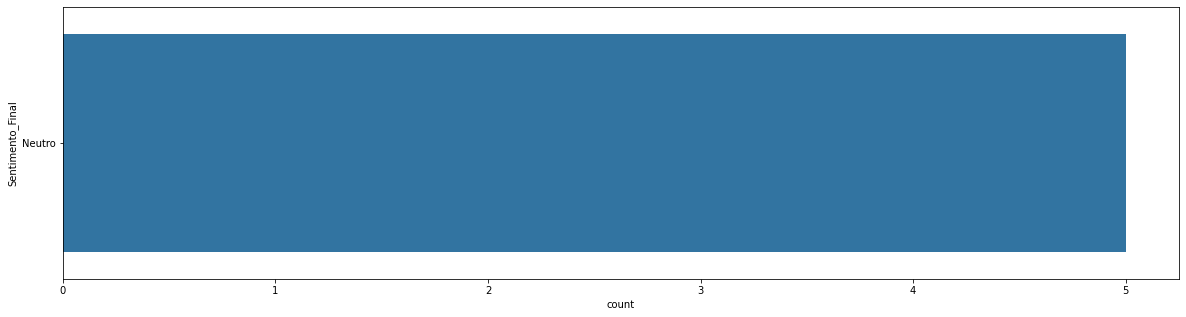

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(y="Sentimento_Final", data=dataframe_sentimento)

In [ ]:
dataframe_Final = dataframe_sentimento[["Data_Hora", "IdTweet", "Tweet", "Candidato", "Tweet_limpo", "Sentimento_Final"]]

In [ ]:
dataframe_Final.to_csv("dataframe_final.csv", sep=',', index=False)